In [1]:
from qiskit import *
from qiskit.visualization import *
import numpy as np
from qiskit.tools.monitor import *
from qiskit.quantum_info import *
from qiskit.extensions import *
from qiskit_experiments.framework import *
from qiskit_experiments.library import *
from qiskit.test.mock import *
from qiskit.providers.aer import *

In [2]:
 sent = Initialize(random_statevector(2))

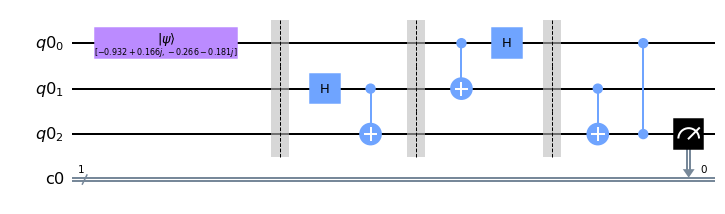

In [3]:
#histogram circuits
qc = QuantumCircuit(QuantumRegister(3), ClassicalRegister(1))
qc.append(sent, [0])
qc.barrier()
qc.h(1)
qc.cx(1, 2)
qc.barrier()
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.cx(1, 2)
qc.cz(0, 2)
qc.measure(2, 0)
qc.draw()

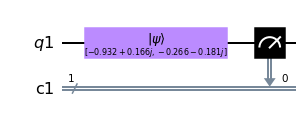

In [4]:
measure = QuantumCircuit(QuantumRegister(1), ClassicalRegister(1))
measure.append(sent, [0])
measure.measure(0, 0)
measure.draw()

In [5]:
#initializing backends
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito')
quito_sim = AerSimulator.from_backend(FakeQuito())
simulator = Aer.get_backend('qasm_simulator')

In [6]:
#real hardware
job = execute(qc, backend = backend, shots = 1024)
mjob = execute(measure, backend = backend, shots = 1024)
results = job.result()
mresults = mjob.result()
counts = results.get_counts()
mcounts = mresults.get_counts()

In [7]:
#noiseless simulation
simjob = execute(qc, backend = simulator, shots = 1024)
msimjob = execute(measure, backend = simulator, shots = 1024)
simres = simjob.result()
msimres = msimjob.result()
simcounts = simres.get_counts()
msimcounts = msimres.get_counts()

In [8]:
#noisy simulation
noisejob = execute(qc, backend = quito_sim, shots = 1024)
mnoisejob = execute(measure, backend = quito_sim, shots = 1024)
noiseres = noisejob.result()
noisecounts = noiseres.get_counts()

In [13]:
mnoiseres = mnoisejob.result()
mnoisecounts = mnoiseres.get_counts()

{'0': 926, '1': 98}
{'0': 884, '1': 140}


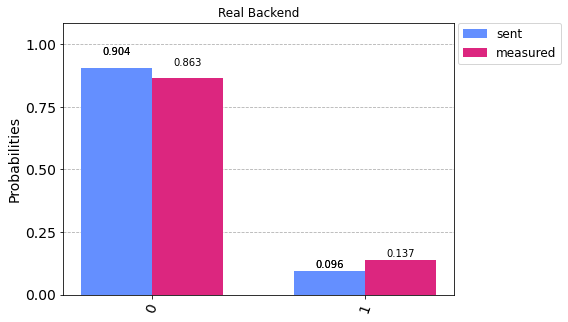

In [10]:
print(mcounts)
print(counts)
plot_histogram([mcounts, counts], legend = ['sent', 'measured'], title = 'Real Backend')

{'0': 905, '1': 119}
{'1': 109, '0': 915}


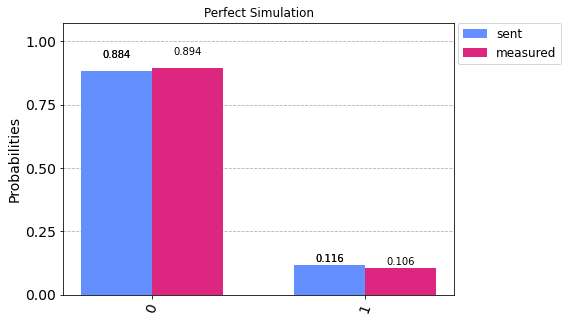

In [11]:
print(msimcounts)
print(simcounts)
plot_histogram([msimcounts, simcounts], legend = ['sent', 'measured'], title = 'Perfect Simulation')

{'0': 901, '1': 123}
{'0': 870, '1': 154}


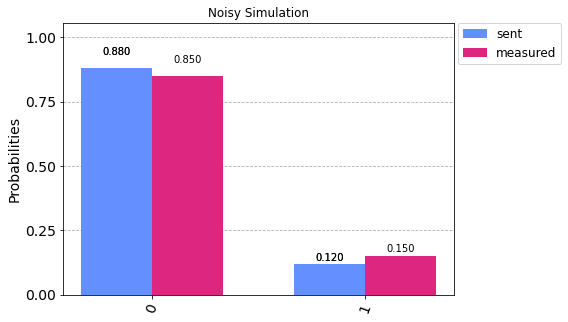

In [14]:
print(mnoisecounts)
print(noisecounts)
plot_histogram([mnoisecounts, noisecounts], legend = ['sent', 'measured'], title = "Noisy Simulation")

In [15]:
exp = StateTomography(qc)
data = exp.run(simulator, seed_simulation=1024).block_for_results()
state_analysis = data.analysis_results("state").value
print(data.analysis_results)

<bound method DbExperimentDataV1.analysis_results of <ExperimentData[StateTomography], backend: qasm_simulator, status: ExperimentStatus.DONE, experiment_id: 2e6f2279-a2f4-489f-8091-862e4a606241>>


In [16]:
'''
exp.analysis.set_options(fitter='cvxpy_gaussian_lstsq')
data2 = exp.run(simulator, seed_simulation=1024).block_for_results()
state_analysis2 = data2.analysis_results("state")
print(state_analysis2)
print("\n")
for key, val in state_analysis2.extra.items():
    print(f"- {key}: {val}")
'''

'\nexp.analysis.set_options(fitter=\'cvxpy_gaussian_lstsq\')\ndata2 = exp.run(simulator, seed_simulation=1024).block_for_results()\nstate_analysis2 = data2.analysis_results("state")\nprint(state_analysis2)\nprint("\n")\nfor key, val in state_analysis2.extra.items():\n    print(f"- {key}: {val}")\n'

In [17]:
plot_state_city(results.get_statevector(qc), figsize = [20, 10], color = ['skyblue', 'skyblue'])

QiskitError: 'No statevector for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000023D1A48A5E0>"'

In [ ]:
plot_state_city(simres.get_statevector(qc), figsize = [20, 10], color = ['skyblue', 'skyblue'])

In [ ]:
plot_state_city(noiseres.get_statevector(qc), figsize = [20, 10], color = ['skyblue', 'skyblue'])